In [7]:
import os
from my_dataset.dataloader import BrainDataset
from matplotlib import pyplot as plt
from my_lightning_module.segmenter import SegModel, ModelEnum
import numpy as np
import math
import random

In [8]:
data_dir = '/media/idham/SpaceX/333_workspace/my_lab/stacked_img_msk_data_dirs.npy'
data_path = np.load(data_dir, allow_pickle=True)
data_path.shape

(29541, 2)

In [161]:
dataset = BrainDataset(data_path[:,0], data_path[:,1])

In [231]:
index = math.floor(random.random() * (len(dataset) - 1))
# index = 22794
img, msk = dataset[index]

8123


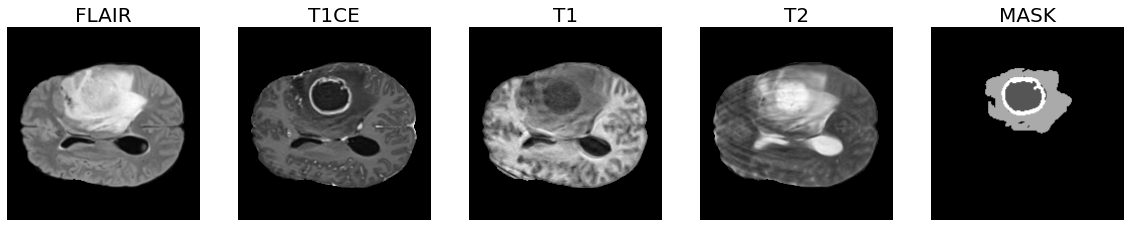

In [232]:
titles = ('flair', 't1ce', 't1', 't2')
fig, axis = plt.subplots(nrows=1, ncols=5, figsize=(20,10))

print(index)

for i, ax in enumerate(axis):
    ax.axis('off')
    if i < 4:
        ax.imshow(img[i, ...], cmap='gray')
        ax.set_title(titles[i].upper(), fontsize=20)
    else:
        ax.imshow(msk.argmax(dim=0), cmap='gray')
        ax.set_title('mask'.upper(), fontsize=20)

In [233]:
print(img.unsqueeze(axis=0).shape)
print(msk.unsqueeze(axis=0).shape)

img = img.unsqueeze(axis=0)
msk = msk.unsqueeze(axis=0)

torch.Size([1, 4, 192, 192])
torch.Size([1, 4, 192, 192])


In [192]:
path = 'lightning_logs/version_5/checkpoints/TPR_E_UNET-epoch=29-val_loss=0.09.ckpt'
az1_model = SegModel.load_from_checkpoint(checkpoint_path=path)

In [193]:
path = 'lightning_logs/version_6/checkpoints/TPR_D_UNET-epoch=29-val_loss=0.09.ckpt'
az2_model = SegModel.load_from_checkpoint(checkpoint_path=path)

In [194]:
path = 'lightning_logs/version_9/checkpoints/TPR_ED_UNET_2-epoch=39-val_loss=0.06.ckpt'
az3_model = SegModel.load_from_checkpoint(checkpoint_path=path)

In [195]:
path = 'lightning_logs/version_4/checkpoints/UNET-epoch=27-val_loss=0.10.ckpt'
az_unet_model = SegModel.load_from_checkpoint(checkpoint_path=path)

In [234]:
az1_model.eval()
pred1 = az1_model(img)

az2_model.eval()
pred2 = az2_model(img)

az3_model.eval()
pred3 = az3_model(img)

az_unet_model.eval()
pred_unet = az_unet_model(img)


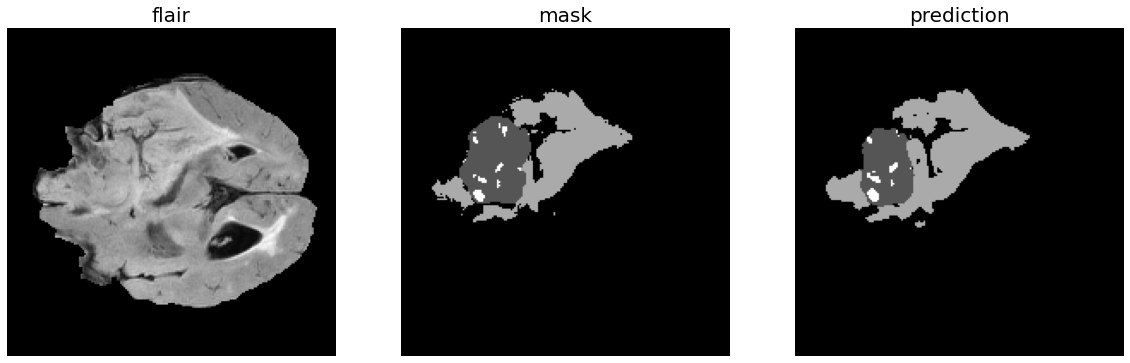

In [20]:
fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(20,7))
for i, ax in enumerate(axis):
    ax.axis('off')
    match i:
        case 0:
            ax.set_title('flair', fontsize=20)
            ax.imshow(img[0, 0, ...], cmap="gray")
        case 1:
            ax.set_title('mask', fontsize=20)
            ax.imshow(msk.argmax(dim=1)[0, ...], cmap="gray")
        case 2:
            ax.set_title('prediction', fontsize=20)
            ax.imshow(pred1.argmax(dim=1)[0, ...], cmap="gray")
fig.savefig(f'plots/az1_{index}.png')
    

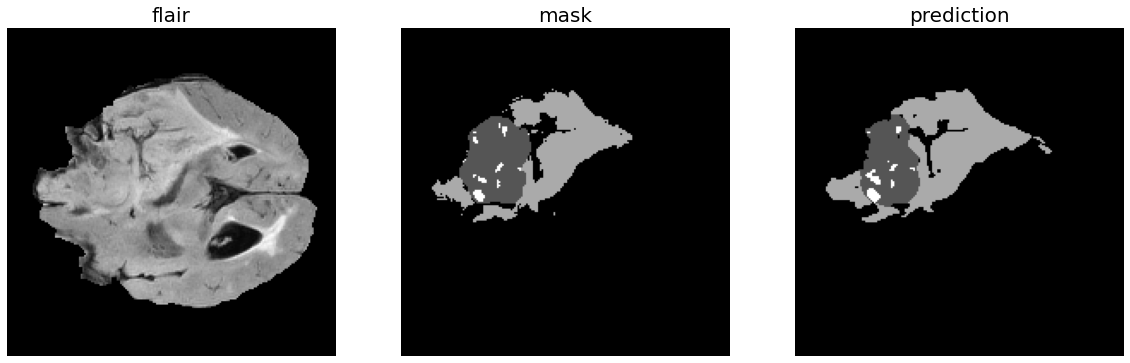

In [21]:
fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(20,7))
for i, ax in enumerate(axis):
    ax.axis('off')
    match i:
        case 0:
            ax.set_title('flair', fontsize=20)
            ax.imshow(img[0, 0, ...], cmap="gray")
        case 1:
            ax.set_title('mask', fontsize=20)
            ax.imshow(msk.argmax(dim=1)[0, ...], cmap="gray")
        case 2:
            ax.set_title('prediction', fontsize=20)
            ax.imshow(pred2.argmax(dim=1)[0, ...], cmap="gray")
fig.savefig(f'plots/az2_{index}.png')

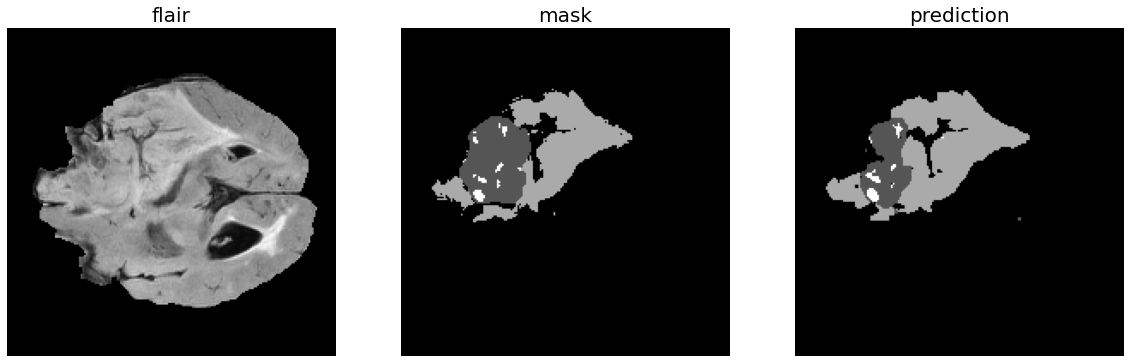

In [22]:
fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(20,7))
for i, ax in enumerate(axis):
    ax.axis('off')
    match i:
        case 0:
            ax.set_title('flair', fontsize=20)
            ax.imshow(img[0, 0, ...], cmap="gray")
        case 1:
            ax.set_title('mask', fontsize=20)
            ax.imshow(msk.argmax(dim=1)[0, ...], cmap="gray")
        case 2:
            ax.set_title('prediction', fontsize=20)
            ax.imshow(pred3.argmax(dim=1)[0, ...], cmap="gray")
fig.savefig(f'plots/az3_{index}.png')

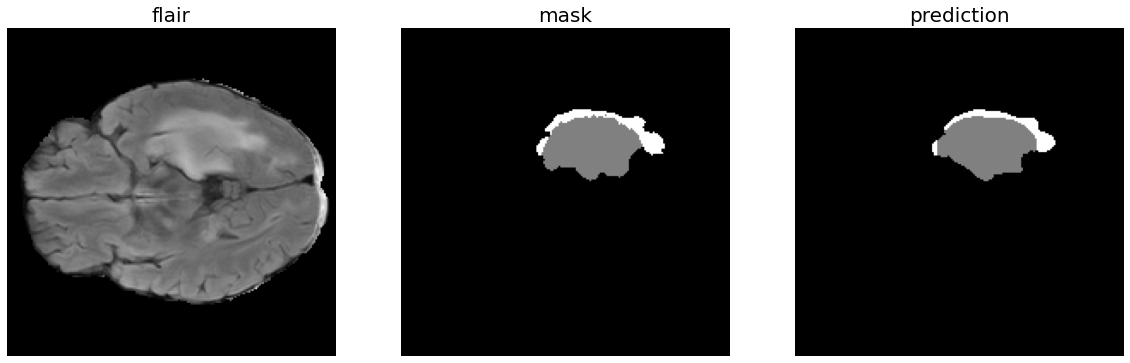

In [12]:
fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(20,7))
for i, ax in enumerate(axis):
    ax.axis('off')
    match i:
        case 0:
            ax.set_title('flair', fontsize=20)
            ax.imshow(img[0, 0, ...], cmap="gray")
        case 1:
            ax.set_title('mask', fontsize=20)
            ax.imshow(msk.argmax(dim=1)[0, ...], cmap="gray")
        case 2:
            ax.set_title('prediction', fontsize=20)
            ax.imshow(pred_unet.argmax(dim=1)[0, ...], cmap="gray")
fig.savefig(f'plots/az_unet_{index}.png')

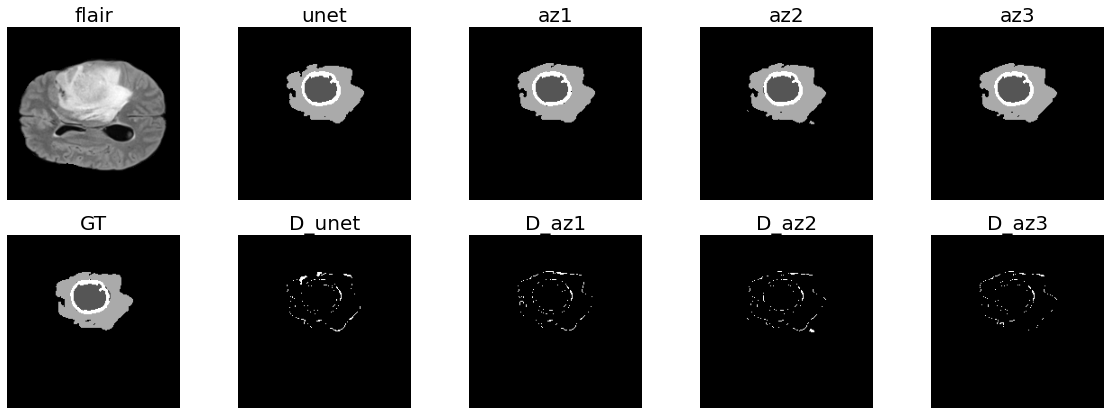

In [235]:
fig, axis = plt.subplots(nrows=2, ncols=5, figsize=(20,7))
for j, axs in enumerate(axis):
    if j == 0:
        for i, ax in enumerate(axs):
            ax.axis('off')
            match i:
                case 0:
                    ax.set_title('flair', fontsize=20)
                    ax.imshow(img[0, 0, ...], cmap="gray")
                case 1:
                    ax.set_title('unet', fontsize=20)
                    ax.imshow(pred_unet.argmax(dim=1)[0, ...], cmap="gray")
                case 2:
                    ax.set_title('az1', fontsize=20)
                    ax.imshow(pred1.argmax(dim=1)[0, ...], cmap="gray")
                case 3:
                    ax.set_title('az2', fontsize=20)
                    ax.imshow(pred2.argmax(dim=1)[0, ...], cmap="gray")
                case 4:
                    ax.set_title('az3', fontsize=20)
                    ax.imshow(pred3.argmax(dim=1)[0, ...], cmap="gray")
        # fig.savefig(f'plots/az_unet_{index}.png')
    if j == 1:
        for i, ax in enumerate(axs):
            ax.axis('off')
            match i:
                case 0:
                    ax.set_title('GT', fontsize=20)
                    ax.imshow(msk.argmax(dim=1)[0, ...], cmap="gray")
                case 1:
                    ax.set_title('D_unet', fontsize=20)
                    _pred_unet = pred_unet.argmax(dim=1)[0, ...]
                    _msk = msk.argmax(dim=1)[0, ...]
                    
                    tmp = np.where(_pred_unet==_msk, 0, 1)
                    ax.imshow(tmp, cmap="gray")
                case 2:
                    ax.set_title('D_az1', fontsize=20)
                    _pred1 = pred1.argmax(dim=1)[0, ...]
                    _msk = msk.argmax(dim=1)[0, ...]
                    
                    tmp1 = np.where(_pred1==_msk, 0, 1)
                    ax.imshow(tmp1, cmap="gray")
                case 3:
                    ax.set_title('D_az2', fontsize=20)
                    _pred2 = pred2.argmax(dim=1)[0, ...]
                    _msk = msk.argmax(dim=1)[0, ...]
                    
                    tmp2 = np.where(_pred2==_msk, 0, 1)
                    ax.imshow(tmp2, cmap="gray")
                case 4:
                    ax.set_title('D_az3', fontsize=20)
                    _pred3 = pred3.argmax(dim=1)[0, ...]
                    _msk = msk.argmax(dim=1)[0, ...]
                    
                    tmp3 = np.where(_pred3==_msk, 0, 1)
                    ax.imshow(tmp3, cmap='gray')
                    
        # fig.savefig(f'plots/az_unet_{index}.png')

In [5]:
import io

f = io.open('plots/indices.txt', mode='r', encoding='utf-8')
idxs = f.read().splitlines()

In [6]:
idxs

['13125',
 '20980',
 '13375',
 '26007',
 '27594',
 '16670',
 '16302',
 '25108',
 '3580',
 '4512',
 '986',
 '22794']